In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor #转换图像数据为张量
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader #数据加载器


In [3]:
LR=1e-3
epochs=20
BATCH_SIZE=128 #批处理大小

In [4]:
train_data = KMNIST(root='./KMNIST_data', train=True, download=True,transform=ToTensor())
test_data = KMNIST(root='./KMNIST_data', train=False, download=True,transform=ToTensor())

e:\miniconda3\envs\py312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [5]:
train_dl=DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dl=DataLoader(test_data, batch_size=BATCH_SIZE)

In [6]:
def train_iter(epochs,model,train_dl):
    train_hsit=[]
    loss_fn=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(model.parameters(),lr=LR)

    for epoch in range(epochs):
        for data,target in train_dl:
            data=data.view(-1,784)
            output=model(data)
            loss=loss_fn(output,target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"epoch:{epoch},loss:{loss.item()}")
        train_hsit.append(loss.item()) #记录训练损失
    return train_hsit        

In [7]:
def draw_tran_hist(hist):
    import matplotlib.pyplot as plt
    plt.plot(hist)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Train loss')
    plt.show()

In [8]:
def test_acc(test_dl,model):
    correct= 0
    total=0
    with torch.no_grad():
        for data,target in test_dl:
            output = model(data.reshape(-1,784))
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return correct/total*100        
            

In [9]:
model1 =nn.Sequential(
    nn.Linear(784, 512),
    nn.Sigmoid(),
    nn.Linear(512, 256),
    nn.Sigmoid(),
    nn.Linear(256, 10) 
    )

In [10]:
model2=nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10) 
)

In [11]:
model3= nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
    )

In [ ]:
model1_hist = train_iter(epochs, model1,train_dl)#增加隐藏层
model2_hist = train_iter(epochs, model2,train_dl)#增加隐藏层,更换激活方式
model3_hist = train_iter(epochs, model3,train_dl)#

epoch:0,loss:2.2942259311676025
epoch:1,loss:2.2943787574768066
epoch:2,loss:2.2934775352478027
epoch:3,loss:2.2923099994659424
epoch:4,loss:2.2942416667938232
epoch:5,loss:2.292288064956665
epoch:6,loss:2.293424129486084
epoch:7,loss:2.291926383972168
epoch:8,loss:2.288800001144409
epoch:9,loss:2.2910213470458984
epoch:10,loss:2.288813352584839
epoch:11,loss:2.2896006107330322
epoch:12,loss:2.2870495319366455
epoch:13,loss:2.286825180053711
epoch:14,loss:2.2859737873077393
epoch:15,loss:2.2856571674346924
epoch:16,loss:2.287126302719116
epoch:17,loss:2.2830326557159424
epoch:18,loss:2.2826669216156006
epoch:19,loss:2.2843143939971924
epoch:0,loss:0.9268338084220886
epoch:1,loss:0.7988100051879883
epoch:2,loss:0.688973605632782
epoch:3,loss:0.8299839496612549
epoch:4,loss:0.6920304894447327
epoch:5,loss:0.698537290096283
epoch:6,loss:0.6895749568939209
epoch:7,loss:0.5285822153091431
epoch:8,loss:0.6572871804237366
epoch:9,loss:0.4837894141674042
epoch:10,loss:0.6012054085731506
epoch:

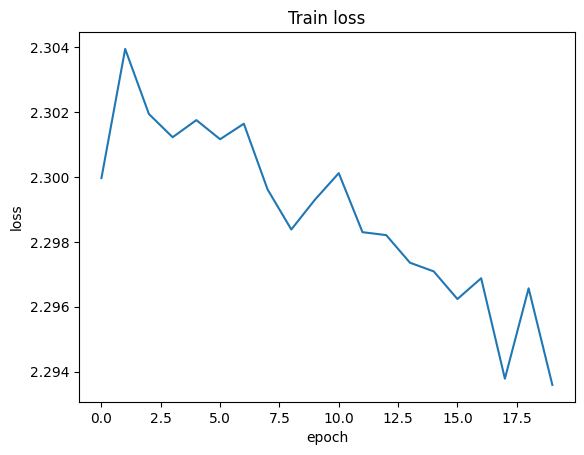

In [13]:
draw_tran_hist(model1_hist)

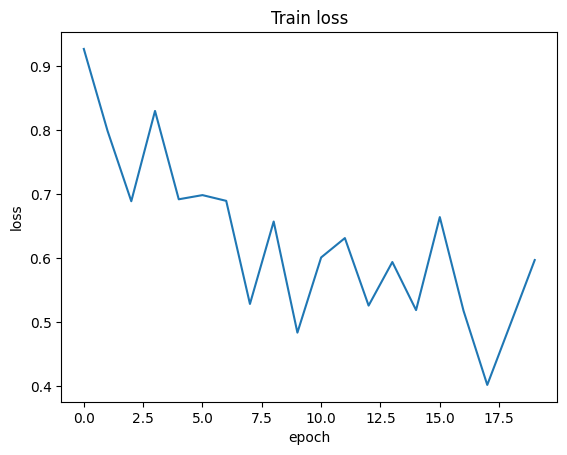

In [15]:
draw_tran_hist(model2_hist)

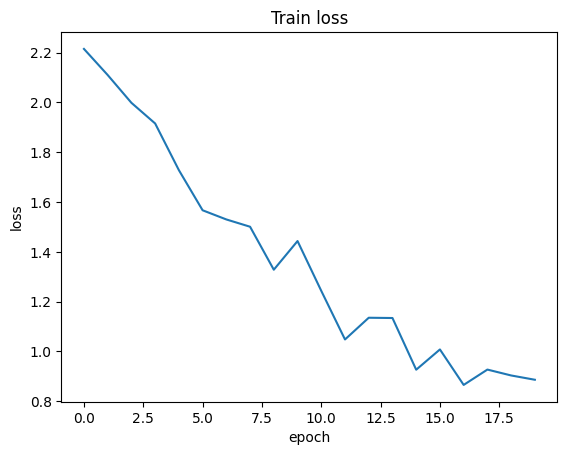

In [16]:
draw_tran_hist(model3_hist)

In [17]:
test_acc(test_dl,model1)

32.85

In [18]:
test_acc(test_dl,model2)

70.03

In [ ]:
test_acc(test_dl,model3)

60.709999999999994

: 